In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import tree
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [58]:
# Data importing
df= pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [34]:
df =df.rename(columns={"Marital.Status":"marital_status","Taxable.Income":"taxable_income","City.Population":"city_population","Work.Experience":"work_experience"})
df

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# Data Cleaning


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   marital_status   600 non-null    object
 2   taxable_income   600 non-null    int64 
 3   city_population  600 non-null    int64 
 4   work_experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [36]:
df.describe()

,taxable_income,city_population,work_experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [37]:
pd.isnull(df).sum()

Undergrad          0
marital_status     0
taxable_income     0
city_population    0
work_experience    0
Urban              0
dtype: int64

In [38]:
def split(num):
    if num <= 30000:
        return "Risky"
    else:
        return "Good"
df.taxable_income = df.taxable_income.apply(split)

In [39]:
df

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [40]:
df.corr()

,city_population,work_experience
city_population,1.000000,0.013135
work_experience,0.013135,1.000000


In [41]:
label_encoder = LabelEncoder()
df.Undergrad = label_encoder.fit_transform(df.Undergrad)
df.marital_status = label_encoder.fit_transform(df.marital_status)
df.Urban = label_encoder.fit_transform(df.Urban)
df

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0
...,...,...,...,...,...,...
595,1,0,Good,39492,7,1
596,1,0,Good,55369,2,1
597,0,0,Good,154058,0,1
598,1,1,Good,180083,17,0


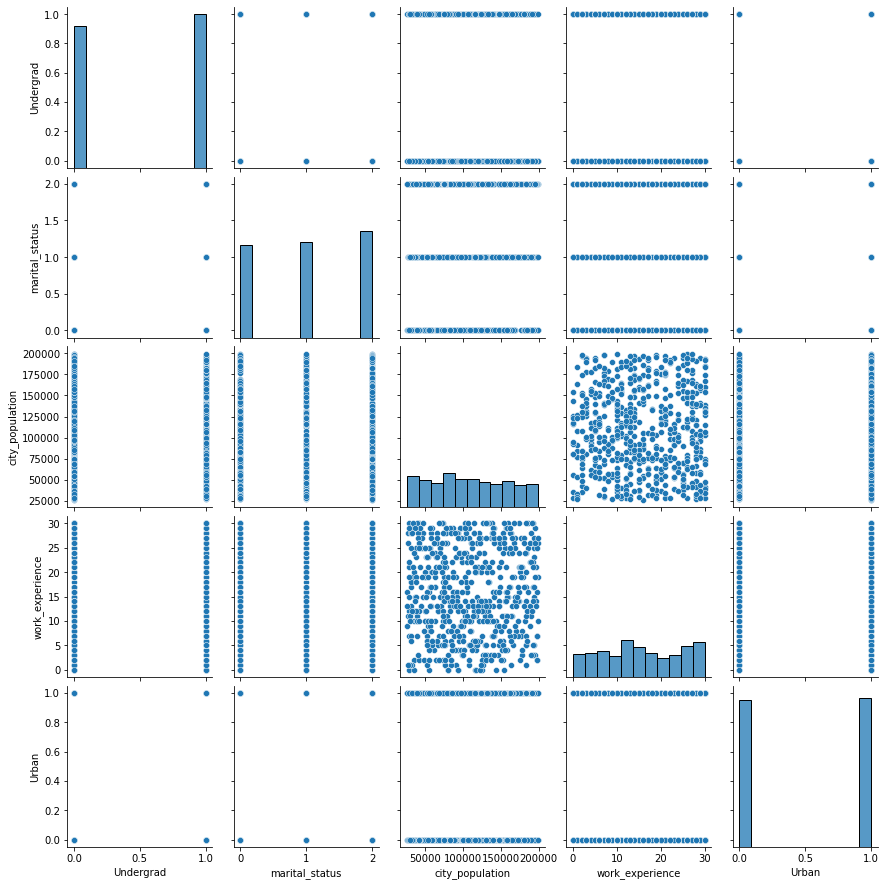

In [42]:
sns.pairplot(df)

<AxesSubplot:>

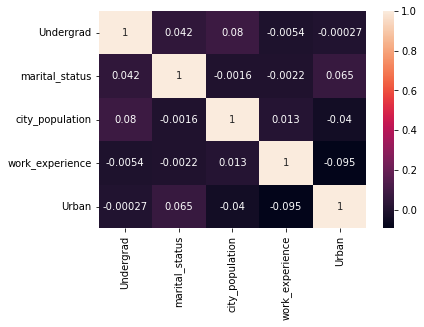

In [43]:
corr = df.corr()
sns.heatmap(corr,annot=True)

In [44]:
x = df.iloc[:,df.columns!="taxable_income"]
y = df.taxable_income
x

,Undergrad,marital_status,city_population,work_experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [45]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: taxable_income, Length: 600, dtype: object

In [46]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

# Building Decision Tree Classifier using Entropy Criteria

In [47]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

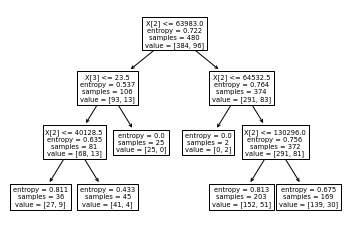

In [48]:
#PLot the decision tree
plot_tree(model)
plt.show()

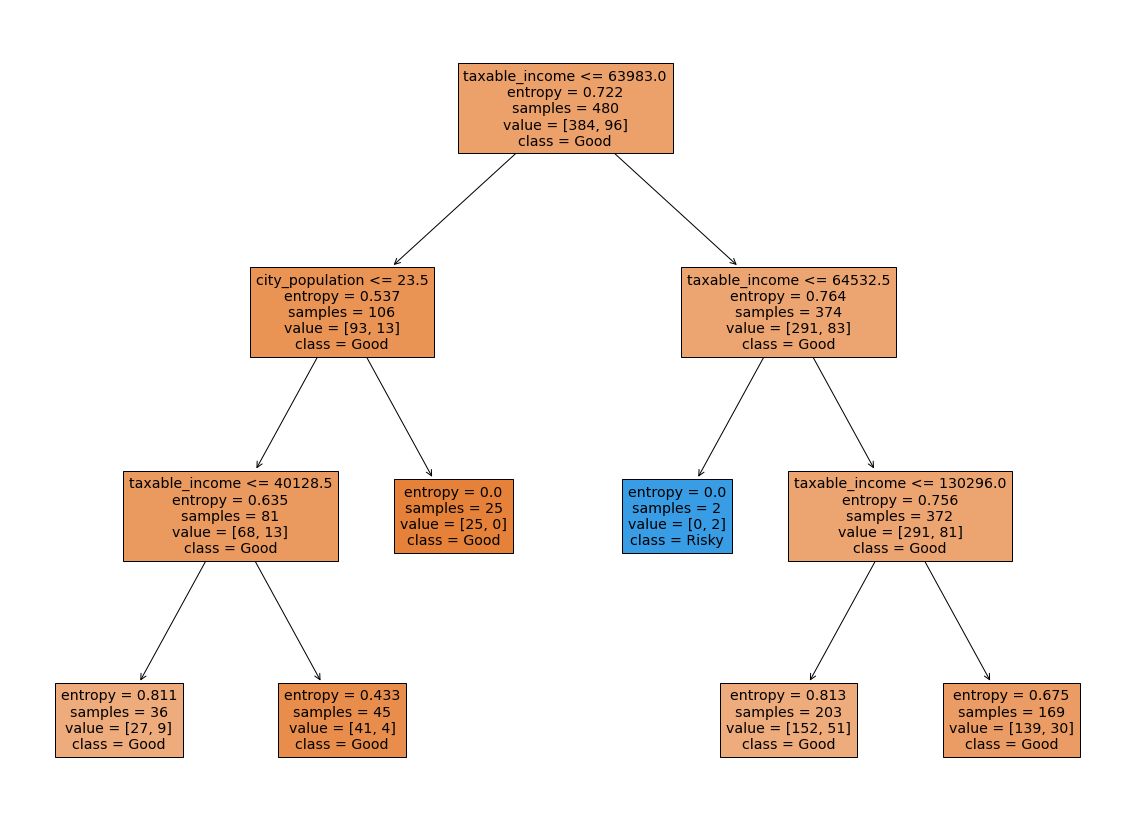

In [49]:
fn = ['Undergrad','marital_status','taxable_income','city_population','work_experience','Urban']
cn = ['Good','Risky']
plt.figure(figsize = (20,15))
plot_tree(model,
          feature_names = fn, 
          class_names = cn,
          filled = True)

plt.show()

In [50]:
model.feature_importances_

array([0.        , 0.        , 0.71003667, 0.28996333, 0.        ])

In [51]:
pred = model.predict(x_test)
pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [52]:
pd.Series(pred).value_counts() # getting the count of each category 

Good    120
dtype: int64

In [53]:
y_test

159     Good
307     Good
253     Good
528     Good
137    Risky
       ...  
102     Good
577     Good
18      Good
560     Good
62      Good
Name: taxable_income, Length: 120, dtype: object

In [54]:
pd.crosstab(y_test,pred) # getting the 2 way table to understand the correct and wrong predictions

col_0,Good
taxable_income,
Good,92
Risky,28


In [55]:
pred == y_test

159     True
307     True
253     True
528     True
137    False
       ...  
102     True
577     True
18      True
560     True
62      True
Name: taxable_income, Length: 120, dtype: bool

In [56]:
# Accuracy 
np.mean(pred == y_test)

0.7666666666666667

In [57]:
df1=pd.DataFrame({"actual":y_test,"predicted":pred})
df1

,actual,predicted
159,Good,Good
307,Good,Good
253,Good,Good
528,Good,Good
137,Risky,Good
...,...,...
102,Good,Good
577,Good,Good
18,Good,Good
560,Good,Good
